# Risk-DeRDaVa

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression

X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_logistic_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

# Shapley values and URDV values
shapley_values = valuable_model.valuate(data_valuation_function="shapley")
urdava_values = valuable_model.valuate(data_valuation_function="robust shapley", coalition_probability=coalition_probability)

# risk averse
risk_averse_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk averse robust shapley", coalition_probability=coalition_probability, lower_tail=1.0)
risk_averse_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk averse robust shapley", coalition_probability=coalition_probability, lower_tail=0.67)
risk_averse_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk averse robust shapley", coalition_probability=coalition_probability, lower_tail=0.33)

# risk seeking
risk_seeking_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk seeking robust shapley", coalition_probability=coalition_probability, upper_tail=1.0)
risk_seeking_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk seeking robust shapley", coalition_probability=coalition_probability, upper_tail=0.67)
risk_seeking_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk seeking robust shapley", coalition_probability=coalition_probability, upper_tail=0.33)

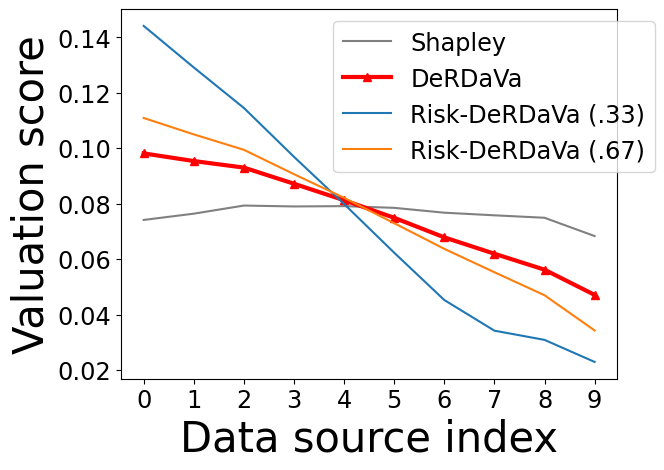

In [20]:
import os

fig, ax = plt.subplots()
X = np.arange(NUM_OF_DATA_SOURCES)

shapley_line, = ax.plot(X, shapley_values.values(), color="gray")
shapley_line.set_label(r"Shapley")

urdv_line, = ax.plot(X, urdava_values.values(), color="red", linewidth=3, marker='^')
urdv_line.set_label(r"DeRDaVa")

risk_averse_33_line, = ax.plot(X, risk_averse_urdava_values_33.values(), color="C0")
risk_averse_33_line.set_label(r"Risk-DeRDaVa (.33)")

risk_averse_67_line, = ax.plot(X, risk_averse_urdava_values_67.values(), color="C1")
risk_averse_67_line.set_label(r"Risk-DeRDaVa (.67)")

#risk_seeking_67_line, = ax.plot(X, risk_seeking_urdava_values_67.values(), color="red", linestyle='--')
#risk_seeking_67_line.set_label(r"Risk-Seeking URDaVa (67%)")

#risk_seeking_33_line, = ax.plot(X, risk_seeking_urdava_values_33.values(), color="orange", linestyle='--')
#risk_seeking_33_line.set_label(r"Risk-Seeking URDaVa (33%)")

ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize=30)
ax.set_xlabel("Data source index", fontsize=30)
ax.legend(loc="upper right", fontsize="xx-large", bbox_to_anchor=(1.1, 1),)
ax.tick_params(axis='both', labelsize='xx-large')


plt.show()
PATH_TO_IMAGES = "./images/risk_derdava/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "rd_10_phoneme_logistic_shapley"), dpi=300, bbox_inches='tight')

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

X, y = load_dataset('diabetes')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_gaussian_nb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

# Beta values and URDV values
beta_values = valuable_model.valuate(data_valuation_function="beta", alpha=16, beta=4)
urdava_values = valuable_model.valuate(data_valuation_function="robust beta", alpha=16, beta=4, coalition_probability=coalition_probability)

# risk averse
risk_averse_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk averse robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, lower_tail=1.0)
risk_averse_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk averse robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, lower_tail=0.67)
risk_averse_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk averse robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, lower_tail=0.33)

# risk seeking
risk_seeking_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk seeking robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, upper_tail=1.0)
risk_seeking_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk seeking robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, upper_tail=0.67)
risk_seeking_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk seeking robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, upper_tail=0.33)





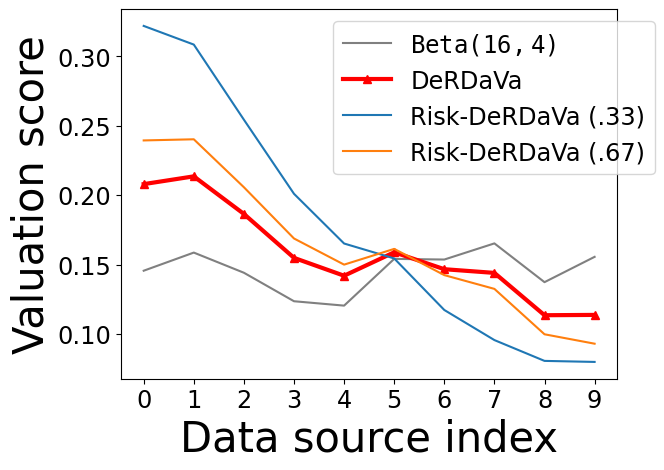

In [26]:
import os

fig, ax = plt.subplots()
X = np.arange(NUM_OF_DATA_SOURCES)

shapley_line, = ax.plot(X, beta_values.values(), color="gray")
shapley_line.set_label(r"$\mathtt{Beta(16, 4)}$")

urdv_line, = ax.plot(X, urdava_values.values(), color="red", linewidth=3, marker='^')
urdv_line.set_label(r"DeRDaVa")

risk_averse_33_line, = ax.plot(X, risk_averse_urdava_values_33.values(), color="C0")
risk_averse_33_line.set_label(r"Risk-DeRDaVa (.33)")

risk_averse_67_line, = ax.plot(X, risk_averse_urdava_values_67.values(), color="C1")
risk_averse_67_line.set_label(r"Risk-DeRDaVa (.67)")

#risk_seeking_67_line, = ax.plot(X, risk_seeking_urdava_values_67.values(), color="red", linestyle='--')
#risk_seeking_67_line.set_label(r"Risk-Seeking URDaVa (67%)")

#risk_seeking_33_line, = ax.plot(X, risk_seeking_urdava_values_33.values(), color="orange", linestyle='--')
#risk_seeking_33_line.set_label(r"Risk-Seeking URDaVa (33%)")

ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize=30)
ax.set_xlabel("Data source index", fontsize=30)
ax.legend(loc="upper right", fontsize="xx-large", bbox_to_anchor=(1.1, 1),)
ax.tick_params(axis='both', labelsize='xx-large')


plt.show()
PATH_TO_IMAGES = "./images/risk_derdava/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "rd_10_diabetes_nb_beta_16_4"), dpi=300, bbox_inches='tight')